<center> <h1> Modelos Predictivos </h1> </center>

### Carga de datos preprocesados y partición en entrenamiento y validación

In [1]:
# Manipulacion de datos...
import pandas as pd
import numpy as np
# Visualizacion de datos...
import matplotlib.pyplot as plt
import seaborn as sns
# Modelo...
from sklearn.linear_model import LogisticRegression
# Metricas de evaluacion...
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import scikitplot as skplt
# No presentar advertencias...
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",None) # Visualizar todas las columnas
df_preprocessing = pd.read_csv("../Data/Preprocessing/preprocessing_data.csv")
df_preprocessing.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests,year_res_status_date,month_res_status_date,day_res_status_date,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0.0,0.464043,0.5,0.0,0.0,0.00000,0.036364,0.0,0.0,0.0,0.0,0.0,0.001180,0.0,0.0,0.333333,0.545455,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.000000,0.5,0.0,0.0,0.00000,0.036364,0.0,0.0,0.0,0.0,0.0,0.001180,0.0,0.0,0.333333,0.545455,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.009498,0.5,0.0,0.0,0.02439,0.018182,0.0,0.0,0.0,0.0,0.0,0.015053,0.0,0.0,0.333333,0.545455,0.033333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.017639,0.5,0.0,0.0,0.02439,0.018182,0.0,0.0,0.0,0.0,0.0,0.015053,0.0,0.0,0.333333,0.545455,0.033333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.018996,0.5,0.0,0.0,0.04878,0.036364,0.0,0.0,0.0,0.0,0.0,0.019307,0.0,0.2,0.333333,0.545455,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


* Particionamiento del dataset en entrenamiento y validación

Separar variables dependientes e independientes:

In [3]:
X = df_preprocessing.drop("is_canceled",axis=1)
y = df_preprocessing["is_canceled"].values

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=42)

**Validando Shapes**

In [8]:
X_train.shape

(95118, 53)

In [9]:
X_test.shape

(23780, 53)

## Regresión Logística

In [10]:
model_lr = LogisticRegression(random_state=42)
# Entrenamiento del modelo...
model_lr.fit(X_train,y_train)
# Predicciones...
y_pred_lr = model_lr.predict(X_test)
print(accuracy_score(y_test,y_pred_lr))

0.8085365853658537


#### Evaluando modelo regresión Logística

Axes(0.125,0.11;0.775x0.77)


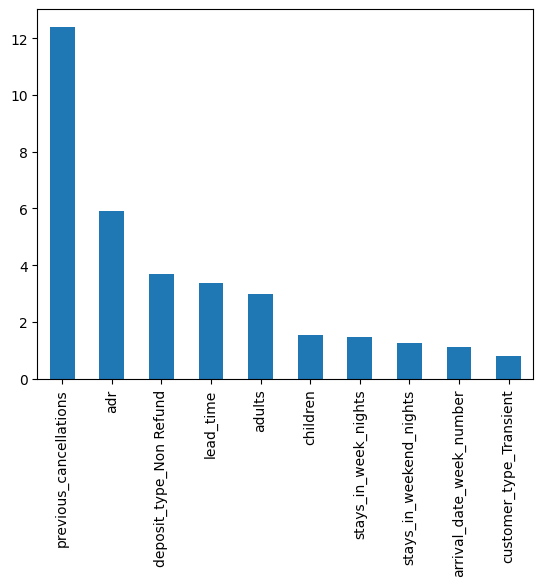

In [11]:
weights = pd.Series(model_lr.coef_[0],
                   index=X_train.columns.values)

print(weights.sort_values(ascending=False)[:10].plot(kind="bar"))

El gráfico de pesos anterior, evidencia que para la predicción positiva (en este caso las variables que conllevan al cancelar la reserva)

Axes(0.125,0.11;0.775x0.77)


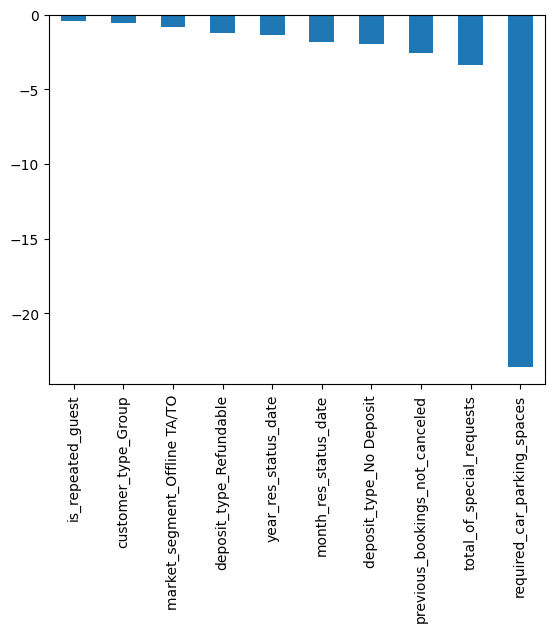

In [12]:
print(weights.sort_values(ascending=False)[-10:].plot(kind="bar"))

De forma similar, aqui observamos de forma descendiente los valores negativos que son las variables que ayudan a predecir cuando el estado es cero, osea, cuando **no hay cancelación**.

<Figure size 1100x1100 with 0 Axes>

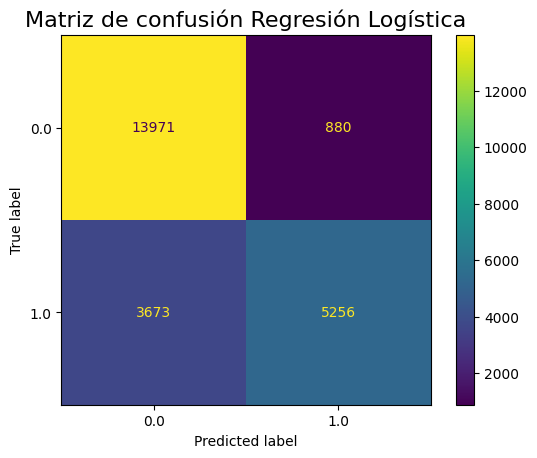

In [13]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, y_pred_lr, labels=model_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_lr.classes_)
disp.plot(cmap="viridis")
plt.title("Matriz de confusión Regresión Logística", fontsize=16)
plt.show()

In [ ]:
1731+683

In [14]:
# Metricas de evaluacion...
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86     14851
         1.0       0.86      0.59      0.70      8929

    accuracy                           0.81     23780
   macro avg       0.82      0.76      0.78     23780
weighted avg       0.82      0.81      0.80     23780



**Curva ROC**

In [15]:
y_prob_lr = model_lr.predict_proba(X_test)

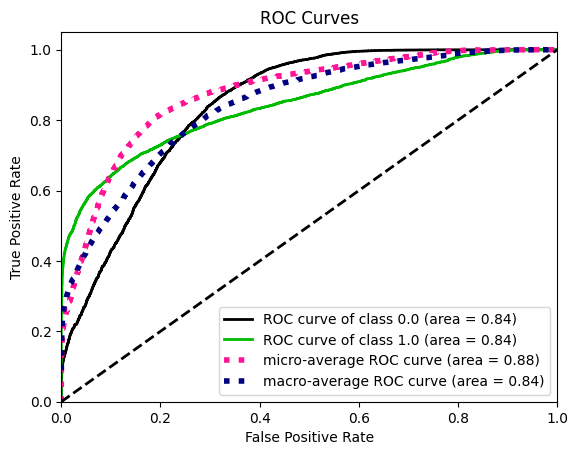

In [16]:
skplt.metrics.plot_roc_curve(y_test,y_prob_lr)
plt.show()

### Redes Neuronales

In [20]:
from keras import models, layers, optimizers, regularizers
from keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get("accuracy") > 0.85:
      print("Lo logramos, nuestro modelo llego a 85%, detenemos el entrenamiento")
      self.model.stop_training = True

In [21]:
# Modelo Redes neuronales con regulizers...
NN = models.Sequential()
# Capa de entrada...
NN.add(layers.Dense(64, activation = "relu", input_dim = X_train.shape[1],kernel_initializer="he_uniform"))

# DropOut... inactivando el 50% de las neuronas
NN.add(layers.Dropout(0.5))

# Anadiendo 2 capas mas (ocultas)...
NN.add(layers.Dense(32, activation = "relu",kernel_initializer="he_uniform")) # input ya se sabe q entra
NN.add(layers.Dense(16, activation = "relu",kernel_initializer="he_uniform")) # input ya se sabe q entra
NN.add(layers.Dense(8, activation = "relu",kernel_initializer="he_uniform")) # input ya se sabe q entra
# DropOut... inactivando el 40% de las neuronas
NN.add(layers.Dropout(0.4))
# Capa de salida con func activacion sigmoid por clasificacion binaria...
NN.add(layers.Dense(1, activation = "sigmoid"))

# optimizers...
opt = optimizers.SGD(lr=0.01, momentum=0.9)
# Compilar modelo...
# rmsprop version mejorada descenso gradiente:
NN.compile(optimizer="rmsprop", loss="binary_crossentropy",
             metrics="accuracy")

# Callback:
callback = TrainingCallback()
#callbacks= [callback] (poner despues de epochs en entrenamiento...)
# Entrenando...
history = NN.fit(X_train,y_train, epochs=250,
                   batch_size = 120, validation_data=(X_test,y_test))

Epoch 1/250
793/793 [==============================] - 4s 3ms/step - loss: 0.5525 - accuracy: 0.7184 - val_loss: 0.4772 - val_accuracy: 0.7499
Epoch 2/250
793/793 [==============================] - 2s 3ms/step - loss: 0.4781 - accuracy: 0.7791 - val_loss: 0.4316 - val_accuracy: 0.8083
Epoch 3/250
793/793 [==============================] - 2s 2ms/step - loss: 0.4491 - accuracy: 0.8015 - val_loss: 0.4058 - val_accuracy: 0.8263
Epoch 4/250
793/793 [==============================] - 2s 2ms/step - loss: 0.4314 - accuracy: 0.8123 - val_loss: 0.3828 - val_accuracy: 0.8386
Epoch 5/250
793/793 [==============================] - 2s 2ms/step - loss: 0.4127 - accuracy: 0.8235 - val_loss: 0.3406 - val_accuracy: 0.8679
Epoch 6/250
793/793 [==============================] - 2s 3ms/step - loss: 0.3673 - accuracy: 0.8502 - val_loss: 0.2460 - val_accuracy: 0.9137
Epoch 7/250
793/793 [==============================] - 2s 3ms/step - loss: 0.3070 - accuracy: 0.8813 - val_loss: 0.1690 - val_accuracy: 0.9468

In [22]:
NN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                3456      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_14 (Dense)            (None, 1)                

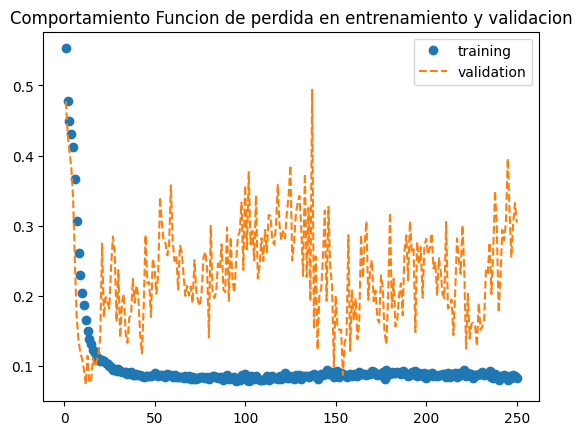

In [23]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

# epocas igual a rango entre 1 y longitud loss values + 1 para rango en eje x
epochs = range(1,len(loss_values)+1)

# Grafica...
plt.plot(epochs,loss_values,"o",label="training")
plt.plot(epochs,val_loss_values,"--",label="validation")
plt.title("Comportamiento Funcion de perdida en entrenamiento y validacion")
plt.legend()
plt.show()

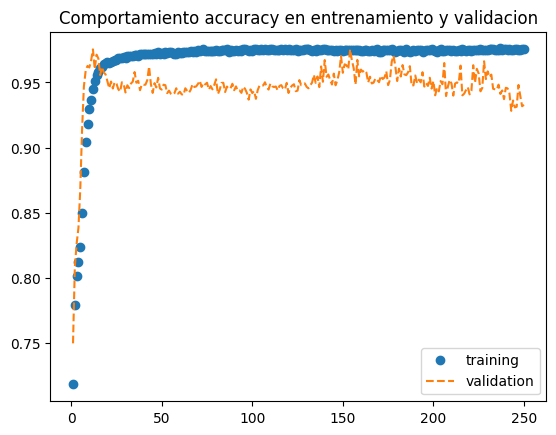

In [24]:
history_dict = history.history
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]

# epocas igual a rango entre 1 y longitud loss values + 1 para rango en eje x
epochs = range(1,len(accuracy_values)+1)

# Grafica...
plt.plot(epochs,accuracy_values,"o",label="training")
plt.plot(epochs,val_accuracy_values,"--",label="validation")
plt.title("Comportamiento accuracy en entrenamiento y validacion")
plt.legend()
plt.show()

In [25]:
#PREDICCIONES
Y_ann = NN.predict(X_test)
Y_ann = Y_ann > 0.5
Y_ann.shape

744/744 [==============================] - 1s 847us/step


(23780, 1)

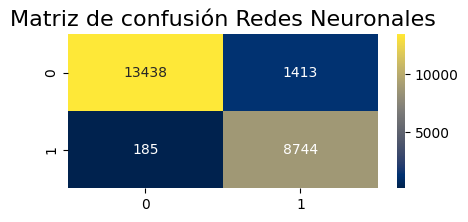

In [26]:
plt.figure(figsize=(5,2))
plt.title("Matriz de confusión Redes Neuronales", fontsize=16)
sns.heatmap(confusion_matrix(y_test,Y_ann),annot=True,
           cmap="cividis",fmt=".0f")
plt.show();

In [27]:
precision_ann = accuracy_score(y_test,Y_ann)
print("Accuracy del modelo Redes Neuronales:")
print(precision_ann)

Accuracy del modelo Redes Neuronales:
0.9328006728343146


In [28]:
# Reporte de clasificación del modelo...
target_names = ['Non-Canceled', 'Canceled']
print(classification_report(y_test, Y_ann, target_names=target_names))

              precision    recall  f1-score   support

Non-Canceled       0.99      0.90      0.94     14851
    Canceled       0.86      0.98      0.92      8929

    accuracy                           0.93     23780
   macro avg       0.92      0.94      0.93     23780
weighted avg       0.94      0.93      0.93     23780



In [29]:
# Probabilidades de cancelacion predichas Redes Neuronales...
Y_ann_prob = NN.predict(X_test, verbose=1)
Y_ann_prob

744/744 [==============================] - 1s 950us/step


array([[0.9999992 ],
       [0.16143523],
       [0.00289264],
       ...,
       [0.29484892],
       [0.9999637 ],
       [0.00282061]], dtype=float32)

### Gradient Boosting Trees

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
# Optimizacion parametrica...
from sklearn.model_selection import RandomizedSearchCV

In [31]:
# Definir regressor...
# Se define sin ningun parametro para configurarlos

clf_gbt_opt = GradientBoostingClassifier(random_state=42)

# Definicon de grilla de parametros...
parametros = {
    "loss": ["los_loss","exponential"],
    "learning_rate": [0.001, 0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300, 400],
    "subsample": [0.0,0.5,1.0],
    "criterion": ["friedman_mse"],
    "max_depth": [3, 5, 8, 10]
}

rand_est_gbt = RandomizedSearchCV(clf_gbt_opt, parametros, n_iter=50,
    cv=6, scoring="accuracy").fit(X_train,y_train)

print(rand_est_gbt.best_estimator_)

print("="*80)
print(rand_est_gbt.best_params_)

GradientBoostingClassifier(learning_rate=0.2, loss='exponential', max_depth=8,
                           n_estimators=200, random_state=42, subsample=0.5)
{'subsample': 0.5, 'n_estimators': 200, 'max_depth': 8, 'loss': 'exponential', 'learning_rate': 0.2, 'criterion': 'friedman_mse'}


In [32]:
# Predicciones de la probabilidad de cancelaciones con el modelo
gbt_preds_opt = rand_est_gbt.predict_proba(X_test)

# Dataframes con probabilidades de cancelaciones predichas y datos reales
preds_df_opt = pd.DataFrame(gbt_preds_opt[:,1], columns = ['prob_canceled'])
true_df = pd.DataFrame(y_test, columns=["real_date_canceled"])

# Comparación de los dos marcos de datos
print(pd.concat([true_df.reset_index(drop = True), preds_df_opt], axis = 1))

       real_date_canceled  prob_canceled
0                     1.0   1.000000e+00
1                     1.0   9.403611e-01
2                     0.0   4.736418e-08
3                     1.0   9.682274e-01
4                     0.0   2.827369e-07
...                   ...            ...
23775                 1.0   1.000000e+00
23776                 0.0   4.454129e-07
23777                 0.0   6.068021e-10
23778                 1.0   1.852259e-01
23779                 0.0   4.927700e-07

[23780 rows x 2 columns]


In [33]:
# Predicciones...
gbt_preds_opt = rand_est_gbt.predict(X_test)

# Cadena de valores de los resulta
print(gbt_preds_opt)

[1. 1. 0. ... 0. 0. 0.]


In [34]:
# Reporte de clasificación del modelo
target_names = ['Non-Canceled', 'Canceled']
print(classification_report(y_test, gbt_preds_opt, target_names=target_names))

              precision    recall  f1-score   support

Non-Canceled       1.00      1.00      1.00     14851
    Canceled       1.00      1.00      1.00      8929

    accuracy                           1.00     23780
   macro avg       1.00      1.00      1.00     23780
weighted avg       1.00      1.00      1.00     23780



In [36]:
gbt_proba_opt = rand_est_gbt.predict_proba(X_test)
gbt_proba_opt

array([[7.80868703e-10, 9.99999999e-01],
       [5.96388593e-02, 9.40361141e-01],
       [9.99999953e-01, 4.73641846e-08],
       ...,
       [9.99999999e-01, 6.06802081e-10],
       [8.14774107e-01, 1.85225893e-01],
       [9.99999507e-01, 4.92770004e-07]])

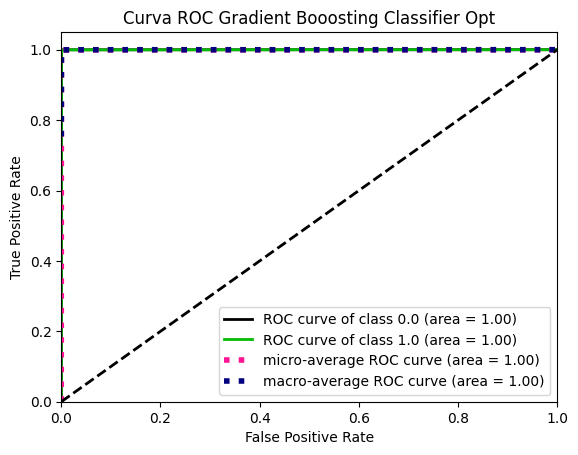

In [37]:
skplt.metrics.plot_roc_curve(y_test,gbt_proba_opt)
plt.title("Curva ROC Gradient Booosting Classifier Opt")
plt.show()

In [38]:
# Accuracy del modelo...
print(accuracy_score(y_test,gbt_preds_opt))

0.9985281749369218


<Figure size 1100x300 with 0 Axes>

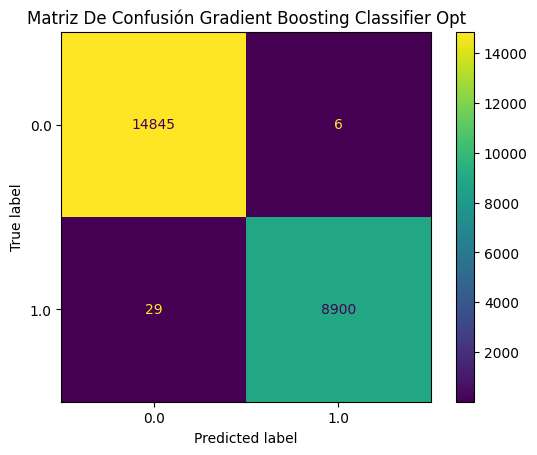

In [40]:
fig = plt.figure(figsize=(11,3))
cm = confusion_matrix(y_test, gbt_preds_opt, labels=rand_est_gbt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rand_est_gbt.classes_)
disp.plot(cmap="viridis")
plt.title("Matriz De Confusión Gradient Boosting Classifier Opt")
plt.show()